In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [3]:
data = pd.read_csv("gas_turbines.csv")
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
data[data.duplicated()].shape

(0, 11)

In [5]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

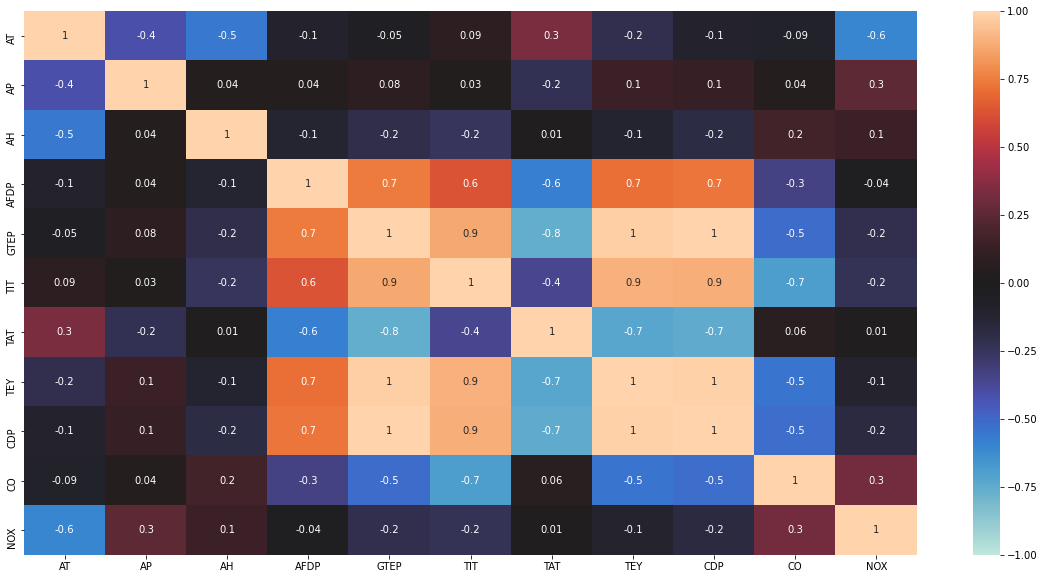

In [6]:
# using heatmap to visualize correlation between the columns
plt.figure(figsize=(20,10))
ax = sns.heatmap(data.corr(), annot=True, fmt='.1g', 
                 vmin=-1, vmax=1, center= 0)# setting the parameters
plt.show()

In [5]:
df = data.drop(['AP','AH','NOX'], axis=1)

In [6]:
df

,AT,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
0,6.8594,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547
1,6.7850,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363
2,6.8977,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012
3,7.0569,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923
4,7.3978,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484
...,...,...,...,...,...,...,...,...
15034,9.0301,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186
15035,7.8879,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470
15036,7.2647,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632
15037,7.0060,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494


In [9]:
#Setting Independent and dependent variables
X = df.drop(['TEY'], axis=1)
y = df['TEY']


In [10]:
X

,AT,AFDP,GTEP,TIT,TAT,CDP,CO
0,6.8594,3.5000,19.663,1059.2,550.00,10.605,3.1547
1,6.7850,3.4998,19.728,1059.3,550.00,10.598,3.2363
2,6.8977,3.4824,19.779,1059.4,549.87,10.601,3.2012
3,7.0569,3.4805,19.792,1059.6,549.99,10.606,3.1923
4,7.3978,3.4976,19.765,1059.7,549.98,10.612,3.2484
...,...,...,...,...,...,...,...
15034,9.0301,3.5421,19.164,1049.7,546.21,10.400,4.5186
15035,7.8879,3.5059,19.414,1046.3,543.22,10.433,4.8470
15036,7.2647,3.4770,19.530,1037.7,537.32,10.483,7.9632
15037,7.0060,3.4486,19.377,1043.2,541.24,10.533,6.2494


In [30]:
# define base model
def baseline_model():
    model = Sequential()
    model.add(Dense(7, input_dim=7, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(4, input_dim= 7, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=10, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -27.93 (81.60) MSE


In [24]:
# define base model
def baseline_model():
    model = Sequential()
    model.add(Dense(14, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(14, input_dim=7,kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    adam = Adam(learning_rate = 0.01)
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=10, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -4.58 (3.00) MSE


In [31]:
# define base model
def baseline_model():
    model = Sequential()
    model.add(Dense(14, input_dim=7, kernel_initializer='normal', activation='relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(14, input_dim=7,kernel_initializer='normal', activation='relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    adam = Adam(learning_rate = 0.01)
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=10, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -0.75 (0.27) MSE
